<a href="https://colab.research.google.com/github/albert-melo/ProgCiencia-de-Dados/blob/master/BKWorkProgCienciaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalho da Disciplina Programação para Ciência de Dados

##Aluno:

> ###Albert Lima de Melo



#Montagem do Drive para acesso a base de dados
Criação do drive para acessar os dados a serem analisados e tratados.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importação da base de dados **_dados-curso-completo.csv_** 
Utilizando a biblioteca do Pandas para leitura do arquivo de dados que estão tabulados no padrão CSV.

In [3]:
import pandas as pd
dados = pd.read_csv("/content/drive/My Drive/WorkProgCD/dados-curso-completo.csv")


#Requisitos

##1. Devem apresentar um resumo (sumário) com as estatísticas dos dados originais, ou seja, sem qualquer pré-processamento. A apresentação deste tipo de informação é relevante para que outras pessoas possam ter uma visão geral dos dados. As estatísticas podem ser apresentadas através de tabelas e/ou gráficos.

#1. Visão Geral dos Dados

A seguir vamos explorar os dados da base disponibilizada

##1.2. Shape
Formato da base de dados

In [11]:
dados.shape

(1658825, 13)

##1.3 Amostra dos dados
Pequena amostra dos dados


In [10]:
dados.head(10)


,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0,56,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0,124,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]
5,2020-05-08 11:21:36,Marcel Silvano,marcelsilvano,"Importantes avanços! A pesquisa brasileira, a ...",4,2769,pt,Macaé,Brazil,BR,NaN,NaN,[]
6,2020-03-10 21:27:40,Teixeira Correia,LidadorNoticias,(Última hora) Volta ao Alentejo: Anulada por c...,0,39,pt,NaN,NaN,NaN,NaN,NaN,[]
7,2020-06-04 13:22:21,Thiago Moraes,ThiagoMoraesPB,João Pessoa tem queda no isolamento social por...,1,3578,pt,NaN,NaN,NaN,NaN,NaN,[]
8,2020-05-07 21:32:12,PT Brasil,ptbrasil,A #tvPT de hoje vai falar sobre a pandemia na ...,10,942696,pt,NaN,NaN,NaN,NaN,NaN,['tvPT']
9,2020-03-11 20:27:49,Niquito ;),NLazaroto,O Coronavirús causou uma pandemia e eu ainda n...,0,215,pt,NaN,NaN,NaN,NaN,NaN,[]


##1.3. Informações sobre os dados


In [5]:
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658825 entries, 0 to 1658824
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   data        1658825 non-null  object 
 1   usuario     1658768 non-null  object 
 2   apelido     1658825 non-null  object 
 3   texto       1658825 non-null  object 
 4   retweet     1658825 non-null  int64  
 5   seguidores  1658825 non-null  int64  
 6   idioma      1658825 non-null  object 
 7   lugar       74605 non-null    object 
 8   pais        74600 non-null    object 
 9   sigla       74595 non-null    object 
 10  latitude    8720 non-null     float64
 11  longitude   8720 non-null     float64
 12  hashtags    1658825 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 164.5+ MB


##1.4. Descrição dos dados

In [42]:
descricao = dados.describe().round(2)
descricao = descricao.transpose()
descricao

,count,mean,std,min,25%,50%,75%,max
retweet,1658825.0,197.85,6337.64,0.00,0.00,0.00,0.00,1139763.00
seguidores,1658825.0,32572.06,368029.99,0.00,101.00,380.00,1470.00,84241250.00
latitude,8720.0,-40.24,20.81,-123.12,-47.86,-43.96,-38.45,174.79
longitude,8720.0,-11.12,19.17,-37.82,-23.31,-19.62,-7.12,58.26


##1.5. Postagens por países
Gráfico que demonstra o volume de postagens dos Tweets por país informado

In [43]:
dados2 = dados
paises = dados2["pais"].drop_duplicates()
paises = list(paises)
dados2 = dados2[dados2['pais'].isin(paises)]
dados2.drop_duplicates()
grp_pais = dados2.groupby('pais')

In [44]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Postagens por país')

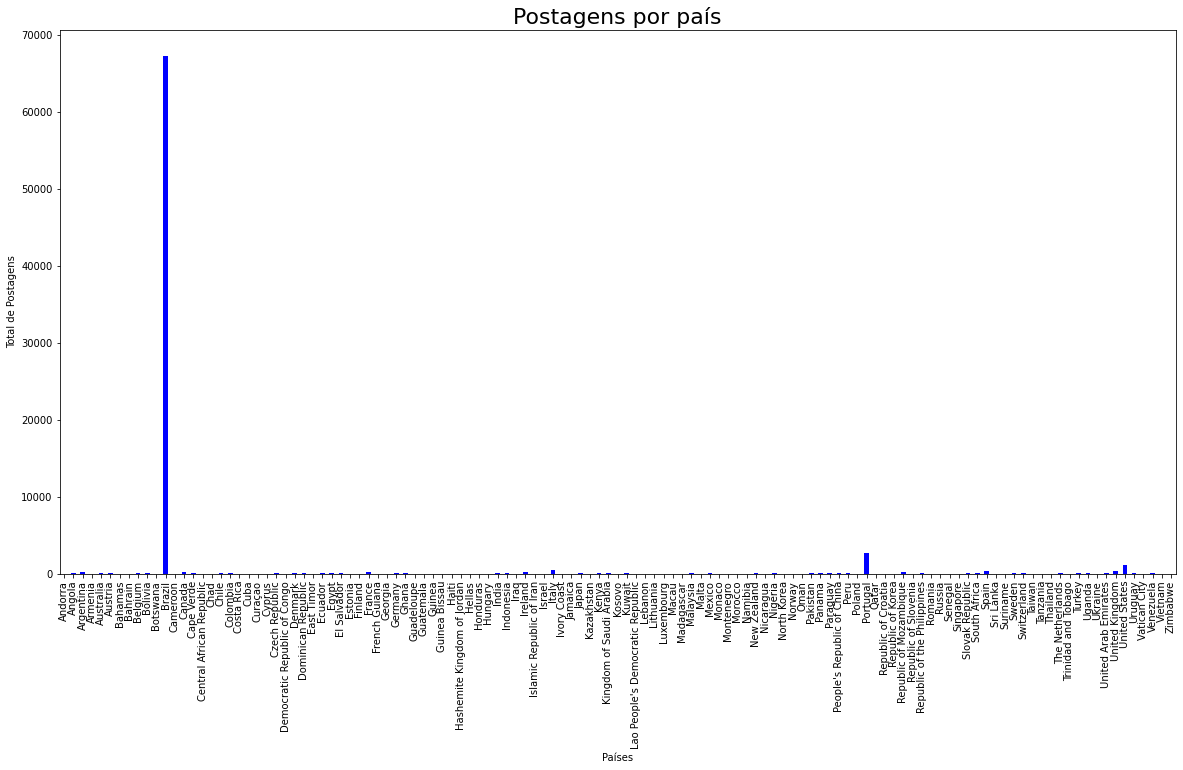

In [45]:
grp_pais[ ['pais'] ].count()

fig = grp_pais['pais'].count().plot.bar(color="blue")
fig.set_ylabel("Total de Postagens")
fig.set_xlabel("Países")
fig.set_title("Postagens por país", {'fontsize': 22})


###1.6. Quantidade de países e comentários com geolocalização

A seguir segue a quantidade de países identificados a partir das postagens realizadas e a quantidade da postagens postagens que possuem geolocalização.

In [60]:
paises = dados["pais"].value_counts()
print("Quandidade de Países:", len(paises))
locais_geo = dados[ dados["longitude"].isnull() ==False ]
print("Comentários com geo localização:", len(locais_geo))


Quandidade de Países: 121
Comentários com geo localização: 8720


##1.7. Visualização das postagens pelo mundo
Postagens pelo mundo dos Tweets que possuem geolocalizacao

In [47]:
pip install geopandas

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 14.8MB 310kB/s 
     |████████████████████████████████| 10.9MB 48.0MB/s 


In [50]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame 

In [61]:
diferencaRegistrosLocais = len(dados) - len(locais_geo)

print("Numero de registros sem geo localização: ", diferencaRegistrosLocais)

Numero de registros sem geo localização:  1650105


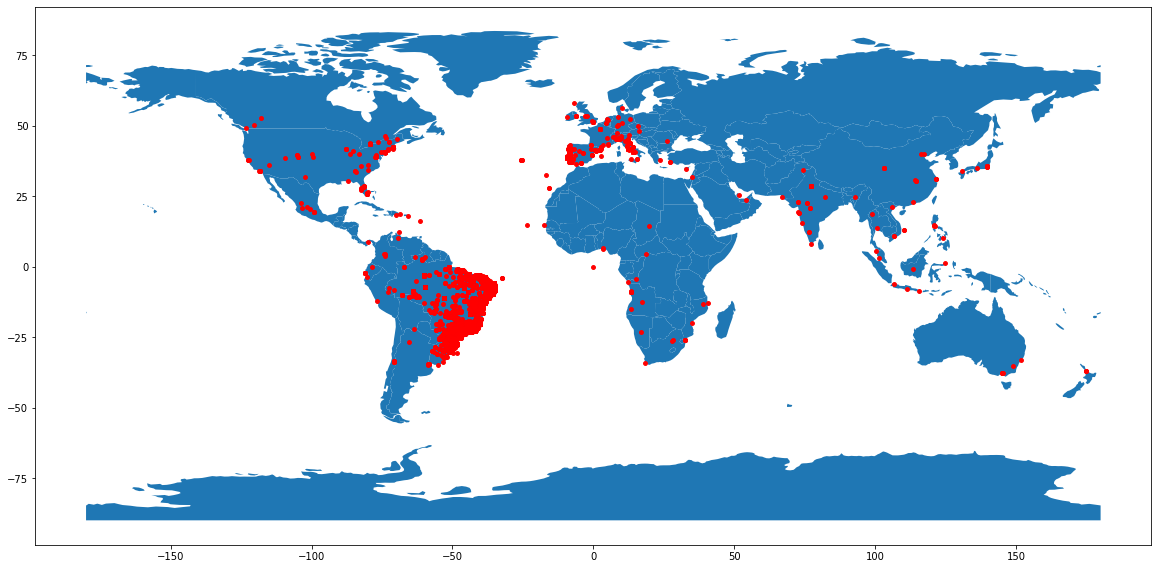

In [63]:
geometry  = [Point(xy) for xy in zip(locais_geo['latitude'], locais_geo['longitude'])]
gdf = GeoDataFrame(locais_geo, geometry = geometry,)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 12)), marker = 'o', color = 'red', markersize = 15)

##2.Gerar base DúvidasDB
As mensagens foram pré-processadas para que as perguntas (questões) fossem identificadas.
Essa coleção de perguntas corresponde ao dataset \DuvidasDB". A seguir, a equipe deve apresentar as estatísticas sobre esses dados.

In [194]:
#Funcao para separar sentenças a partir de um caracter/substring especificada
def separaTexto(texto="", substr=""):
  x = texto.find(substr)
  if x==-1: 
    return "",""
  else:
    return texto[:x+1] , texto[x+1:]
  

In [212]:
#Funcao gera uma lista de sentenças a partir de um caractere informado
def separaPerguntas(texto, caractere):
  perguntas = list()
  while len(texto)>0:
    pergunta, resto = separaTexto(texto, caractere)
    pergunta = pergunta.lstrip(" ")
    if len(pergunta)>1:
      perguntas.append(pergunta)
    if len(resto)==0: break
    texto = resto;
  return perguntas



0 - ? * ;    Hello, welcome to my world.


In [88]:


#Separa os textos que apresentam '?'
pre_perguntas = dados[ dados["texto"].str.contains("?", regex=False) ]
#Converte conteúdo de texto em minúsculo

registro = {'data':'', 'usuario':'', 'apelido':'', 'duvida':'', 'retweet':'', 'seguidores':'', 'idioma':'', 'lugar':'', 'pais':'', 'sigla': '', 'latitude':'' , 'longitude':'', 'hashtags':'' }
#pre_perguntas = dados["texto"].str.lower()
#pre_perguntas = dados[ dados["texto"].str.contains("?", regex=False) ]
pre_perguntas.columns.name = 'indice'
i_perguntas = list( pre_perguntas.index )

for i in range(len(i_perguntas)):
  print(dados.texto[int(i_perguntas[i])])

A saída de streaming foi truncada nas últimas 5000 linhas.
vem cá um cadim, pq a foda, depois de 4 FUCKING MESES de quarentena, tão pedindo lockdown intermitente, negro?
Onde começa o bolsonaro e onde termina o cavalo????

Coitado do cavalo

#CadeiaParaBolsonaroESeuBando… https://t.co/LPt0BKs4Q0
Vocês reclamando que o doria prorrogou a pandemia mas a familia de vocês tão tudo em casa ne? Leva a mãe de vocês s… https://t.co/hhUixvzqiv
Uuuuuuuh já tem “igreja, ‘você quis dizer banco?’” prometendo benção pra imunizar contra o Covid19, já pensaram o e… https://t.co/vNSpwPJhFc
ai gente é a quarentena perdão 

13 PERGUNTAS ALEATÓRIAS 

1 - sabado?
2 - ontem
3 - k, r
4 - ja faz quase meio ano… https://t.co/yT3WaVbCqQ
@opropriopontes Ok. Esta parte tá claro.  Mas qual a intenção trazendo este tema a público agora? Desviar atenção d… https://t.co/xqK80Ylg4R
É lockdown que fala né? https://t.co/JtYsr1HAVK
Qualquer um desses medicamentos mal administrados podem matar. Mas a mídia falou algo assim

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



A saída de streaming foi truncada nas últimas 5000 linhas.
Você prefere viver na duvida, ou morrer porque duvidou? Se você precisar tomar algum remédio para o covid 19, não d… https://t.co/csOLhgsyBA
@CR7DeCastigo Pandemia e avolumar de mortes em itália?who cares. Ronaldo a ser boss
@marciocardio Super, como vai? Vc tem algum artigo que relacione hipertensão e COVID?
O das drogas já li, da miocardite..
mlr minha sinusite tinha que atacar agora? em plena pandemia? a cada espirro minha mãe acha que é o coroga
corona vírus é aquele vírus da cerveja?
@fortalordinaria Mas é só usar cloroquina, tá ok? Foi isso que ouvi na fila do banco.
@SenadorKajuru Não aprenderam nada, LOCKDOWN não é vacina, 14 dias vai ajudar em que? Será que o povo só elege acéfalos?
@oatila Atila, tua conta  não leva em consideração a utilização em massa da cloroquina num suposto sucesso nas testagens?
E desde quando ESSES CANALHAS DA @EmbaixadaChina MANDAM BO BRASIL? Tentem isso E A RESPOSTA SERÁ DURA, SEUS CRIADOR… h

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



A saída de streaming foi truncada nas últimas 5000 linhas.
"Guedes defende isolamento social e… https://t.co/87D502Vwt8
@FSRadioBrasil Algum jogador profissional em atividade no mundo morreu de corona vírus?
@Desesquerdizada será que estão usando a hidroxicloroquina + azitromicina a parti do 2. dia?
@AvesDoDeserto Sim, isso se chama aglomeração, ou o corona virus ja passou e eu não estou sabendo? Se reclamam dos… https://t.co/pzkyWbm0aA
@tiagoduartee_ com tantas mortes pelo covid19 só restaram 2 cearenses vivos? falem por vocês pois sou cearense e no… https://t.co/E3R2bA6G3O
@guilherme_amado @OsmarTerra @FlavioBolsonaro Burrice ou charlatanismo ? Ele mesmo fala que 60% da população teria… https://t.co/jDthfDSGSd
@algsavi @merello1 @GeracaodeValor E Covid + crise econômica (fome) mata mais ou menos? Essa discussão é inócua! Mo… https://t.co/fBaDSE9YvM
@nickmartins_ sim, eu cobrei posicionamento, já deveriam afinal. N sei como vou fazer, minha mãe ta com suspeita (?… https://t.co/EapnXim

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



A saída de streaming foi truncada nas últimas 5000 linhas.
@OsmarTerra H1N1 - TAMIFLU salvou vidas não isolamento...
COVID-19 - HIDROXOCLOROQUINA ??? PORQUE NÃO PODEMOS TOMAR… https://t.co/WrJAMZ6Os9
Pq as criticas as manifestações nos USA em meio à COVID19 não são as mesmas em relação às manifestações de apoio ao Bolsonaro?
Quem têm medo de Coronavírus? https://t.co/Y8YPjxoH1n
@CNNBrasil 201 mortes do coronavirus e pronunciamento de Bolsonaro na TV hoje deve ter panelaço gigante ?
@aifesteves Outro que acredita que o álcool previne o coronavírus?
QUE TAL RESPEITAR A CEM PORCENTO ESTA MERDA DO DISTANCIAMENTO SOCIAL?
Desde quando se faz sexo nestas alturas? https://t.co/dON6xA0Kpu
Alguém explica por que o presida fez o pronunciamento com ponto eletrônico? 

#StayHome #Covid_19 #coronavirus
@jdoriajr Para os ricos e politicos, Cloroquina.
Para o povo... 
O povo???
Que povo???
A tá... Para o povo a ciênci… https://t.co/FEpbbjJYIE
@Estadao @brpolitico como se cria um comitê de crise SEM o 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



A saída de streaming foi truncada nas últimas 5000 linhas.

(1 milhão e 300 mil)
@VEJA Sr Ministro, o Brasil está sem médicos? Cá estamos para servir a Pátria com nosso trabalho e suor para enfren… https://t.co/ZH2a70SWki
@heltonfraga O Nióbio virou cloroquina. Que coisa, não?!
@ArthurWeint Cala a boca, seu burro. Já ouviu falar em efeito colateral? Já ouviu alguém dizer que a cloroquina é 1… https://t.co/hz9InU2QpX
RT @YelchenkoUN: #Лукашевич а кто поставляет оружие вашим отморозкам в Донбассе-может тоже твитните для полноты картины? https://t.co/n4AGa…
Ricos, pq tem que viajar em época de pandemia? https://t.co/IAFl9v9dV2
Petrobrás sobe, pela primeira vez, o preço de combustíveis na pandemia. Faz sentido? Não. Mas se dá em razão do sis… https://t.co/wJPc2t8t4Y
Quais as chances de eu ir pro hospital e pegar corona vírus?
Com o aumento dos casos de coronavírus, prevenção é sempre a melhor solução. 
Mas afinal: como se prevenir?
Higieni… https://t.co/7blWbUyxNr
Opaaaaaa!!! Aí sim.... E 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



###Extraindo as perguntas do dataframe "pre_perguntas"

In [ ]:
type(pre_perguntas)

#Análise dos dados do DuvidasDB

In [ ]:
pre_perguntas.head()